# Theory behind the Calculation of Mean Suspension Rate in State SD

## Objective:

The objective of this document is to outline and evaluate two methods for calculating the mean suspension rate in State **SD** based on the collected data on the total number of students and the number of students who were suspended in each district.

## Data Collection:

The data consists of the total number of students and the number of students suspended in each of the 5 districts [_Sioux Falls, Rapid City, Vermillion, Pierre, Watertown_] within State **SD**.


<center>

| DistrictName | #SusSKids | #TotalSKids | District_Avg% |
|:------------:|:---------:|:-----------:|:-----------:|
| Sioux Falls  |     25    |     200     |     12.5     |
| Rapid City   |     15    |     150     |     10     |
| Vermillion   |     2     |     40      |     5     |
| Pierre       |     0     |     30      |     0     |
| Watertown    |     8     |     80      |     10     |
|   **Total**  |     50    |     500     |     37.5     |
<p align="center">
  <br>
  <em>Table 1: Distribution of Suspended Special Kids in SD</em>
  
</p>


</center>






### Option 1: 
### (Total Suspended Specical Students) / Total Specical Students

**Calculation:**
$$ \text{StateMean} = \frac{\text{Total Suspended Students in SD}}{\text{Total Students in SD}} $$




**Example:**

Based on **Table 1** State SD with 500 total students and 50 suspended students across 5 districts.
$$ \text{StateMean} = \frac{50}{500} = 0.10 $$


**Advantages:**
1. **Simple Calculation:** This method involves a straightforward calculation, making it easy to understand and implement.
2. **Overall Picture:** Provides a general overview of the suspension rate for the entire state.

**Disadvantages:**
1. **Lack of District Detail:** Does not take into account variations across districts. The mean might not accurately represent the suspension rates in individual districts.
2. **Skewed by Outliers:** If there are districts with significantly higher or lower suspension rates, the overall mean may be influenced and may not reflect the typical situation.

### Option 2: 
### (Sum of Each District avg rate)/ Total Number of Districts

**Calculation:**
$$ \text{StateMean} = \frac{\text{Average of District A1 + Average of District A2 + ... + Average of District A5}}{5} $$

**Example:**

Based on **Table 1** the suspension rates for 5 districts: Sioux Falls (0.125), Rapid City (0.10), Vermillion (0.05), Pierre (0.0), and Watertown (0.10).

The overall mean for State SD would be the average of these district-wise means %.

$$ \text{StateMean} = \frac{\text{0.125 + 0.10 + 0.05 + 0.0 + 0.10}}{5} $$

$$ \text{StateMean} = \frac{0.375}{5} = 0.075. $$

**Advantages:**
1. **District-Level Detail:** Considers variations at the district level, providing a more detailed view of the suspension rates.
2. **Less Sensitive to Outliers:** Less influenced by extreme values in individual districts.

**Disadvantages:**
1. **Complex Calculation:** Involves calculating averages for each district before calculating the mean, making it more complex than Option 1.
2. **Weighting Issue:** Treats all districts equally, potentially overlooking the impact of larger districts.

## Conclusion:

The choice between Option 1 and **Option 2** depends on the specific goals and context of the analysis. Option 1 is simpler and provides an overall picture, while Option 2 offers more detailed insights into district-level variations. Consideration of the advantages and disadvantages can guide the selection based on the objectives of the analysis.

_______________

## Selecting **Option 2** for the calculation of Sate Mean:


In [1]:
#%%capture
import pandas as pd
import numpy as np  # Import numpy to use NaN values

# Initialize an empty list to store DataFrames
dfs_to_append = []

# Loop through the range of years from 2016 to 2022
for year in range(2016, 2023):
    a = year
    b = a + 1

    # Specify the file paths
    file_path = rf'C:\Users\depr13783\Desktop\DoE\Sadik\Chid Count Extract Data\Child Count Extract {a}.csv'
    file_path1 = rf'C:\Users\depr13783\Desktop\DoE\SusExp\SuspExpul_Race_{a}-{b}.xlsx'

    # Use pandas to read the CSV file into a DataFrame and specify the dtype for column 38
    df = pd.read_csv(file_path, low_memory=False, dtype={'ColumnName38': str})
    df1 = pd.read_excel(file_path1)


    # Using iloc to select columns by index
    idf = df.iloc[:, [0, 2, 9, 8]].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Assuming 'DateColumn' is not in datetime format
    idf['TitleYear'] = pd.to_datetime(idf['TitleYear'], errors='coerce')  # Use errors='coerce' to handle invalid date values

    # Extract the year and create a new column
    idf['TitleYear'] = idf['TitleYear'].dt.year
    df1['TitleYear'] = a

    # Rename the 'OldColumnName' to 'NewColumnName'
    df1.rename(columns={'Race': 'ethnicity'}, inplace=True)

    # Group by 'DistrictName' and count the occurrences, also include 'TitleYear' in the aggregation
    susd_df = df1.groupby(['TitleYear', 'DistrictName'])[
        ' 3B. Children With Out-Of-School Suspensions or Explusions Totaling > 10 Days'].sum().reset_index(name='#SusSKids')
    susd_df['DistrictName'] = susd_df['DistrictName'].replace({
        'Faulkton Area School 24-4': 'Faulkton Area Schools 24-4',
        'Groton Area 60-6': 'Groton Area 06-6',
        'Hitchcock Tulare 56-6': 'Hitchcock-Tulare 56-6',
        'Oglala Lakota County 65-1': 'Oglala Lakota 65-1',
        'Wolsey Wessington 02-6': 'Wolsey-Wessington 02-6'
    })

    tdis_df = idf.groupby(['TitleYear', 'DistrictName']).size().reset_index(name='#TotalSKids')

    # Merge the DataFrames based on the 'DistrictName' column
    district_df = pd.merge(tdis_df, susd_df, on=['TitleYear', 'DistrictName'], how='inner')

    district_df['EDisMean%'] = (district_df['#SusSKids'] / district_df['#TotalSKids']) * 100

    # Append the current year's results to the list
    dfs_to_append.append(district_df)

# Check if the list is not empty before appending
if dfs_to_append:
    # Concatenate the list of DataFrames into a single DataFrame
    allYear_district_df = pd.concat(dfs_to_append, ignore_index=True)

    # Display the final DataFrame containing results for all years
    print(allYear_district_df)
else:
    print("No data to append.")


      TitleYear            DistrictName  #TotalSKids  #SusSKids  EDisMean%
0          2016           Aberdeen 06-1          705          0   0.000000
1          2016   Agar-Blunt-Onida 58-3           44          0   0.000000
2          2016    Alcester-Hudson 61-1           63          0   0.000000
3          2016      Andes Central 11-1           36          0   0.000000
4          2016          Arlington 38-1           33          0   0.000000
...         ...                     ...          ...        ...        ...
1038       2022             Wilmot 54-7           51          1   1.960784
1039       2022             Winner 59-2          126          0   0.000000
1040       2022  Wolsey-Wessington 02-6           74          3   4.054054
1041       2022         Woonsocket 55-4           35          0   0.000000
1042       2022            Yankton 63-3          478          3   0.627615

[1043 rows x 5 columns]


# **State Mean**:

In [2]:
#%%capture

# Assuming your DataFrame is named allYear_district_df
combined_df = allYear_district_df.groupby('TitleYear').agg({
    '#SusSKids': 'sum',
    '#TotalSKids': 'sum',
    'EDisMean%': 'mean'
}).reset_index()

# Rename columns
combined_df.columns = ['TitleYear', '#SusSKids', '#TotalSKids', 'StateMeanRate_O2']

# Calculate StateMeanRate_O1
combined_df['StateMeanRate_O1'] = combined_df['#SusSKids'] * 100 / combined_df['#TotalSKids']

# Reorder columns
combined_df = combined_df[['TitleYear', '#SusSKids', '#TotalSKids', 'StateMeanRate_O1', 'StateMeanRate_O2']]

# Display the resulting DataFrame
print(combined_df)



   TitleYear  #SusSKids  #TotalSKids  StateMeanRate_O1  StateMeanRate_O2
0       2016        109        20210          0.539337          0.301793
1       2017        148        21088          0.701821          0.312068
2       2018        184        21625          0.850867          0.340957
3       2019        121        22085          0.547883          0.238015
4       2020         98        21664          0.452363          0.114183
5       2021        210        22244          0.944075          0.356488
6       2022        158        23152          0.682446          0.330721


______________________

# **_Are the data following normal distribution pattern ?_**


### <span style="color:gray">What is normal, right, left distribution pattern and why do I have to care!!!</span>

### Introduction

When examining a distribution, the presence of heavy right skewness indicates an asymmetry where more data points are concentrated on the left side, with the tail extending to the right. In such instances, traditional measures of central tendency, such as the mean, can be influenced by the long tail, making them less representative. Additionally, extreme values in the right tail can impact the standard deviation.

<p align="center">
  <a href="https://miro.medium.com/v2/resize:fit:828/format:webp/1*zPstfS-OazlezgPiExAiIw.png" target="_blank">
    <img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*zPstfS-OazlezgPiExAiIw.png" alt="Skewness">
  </a>
  <br>
  <em>Source: <a href="https://miro.medium.com/v2/resize:fit:828/format:webp/1*zPstfS-OazlezgPiExAiIw.png" target="_blank">Image Source</a></em>
</p>

### _Blah blah, these are theories <span style="color:brown"> where is the prove !!!</span>_ 


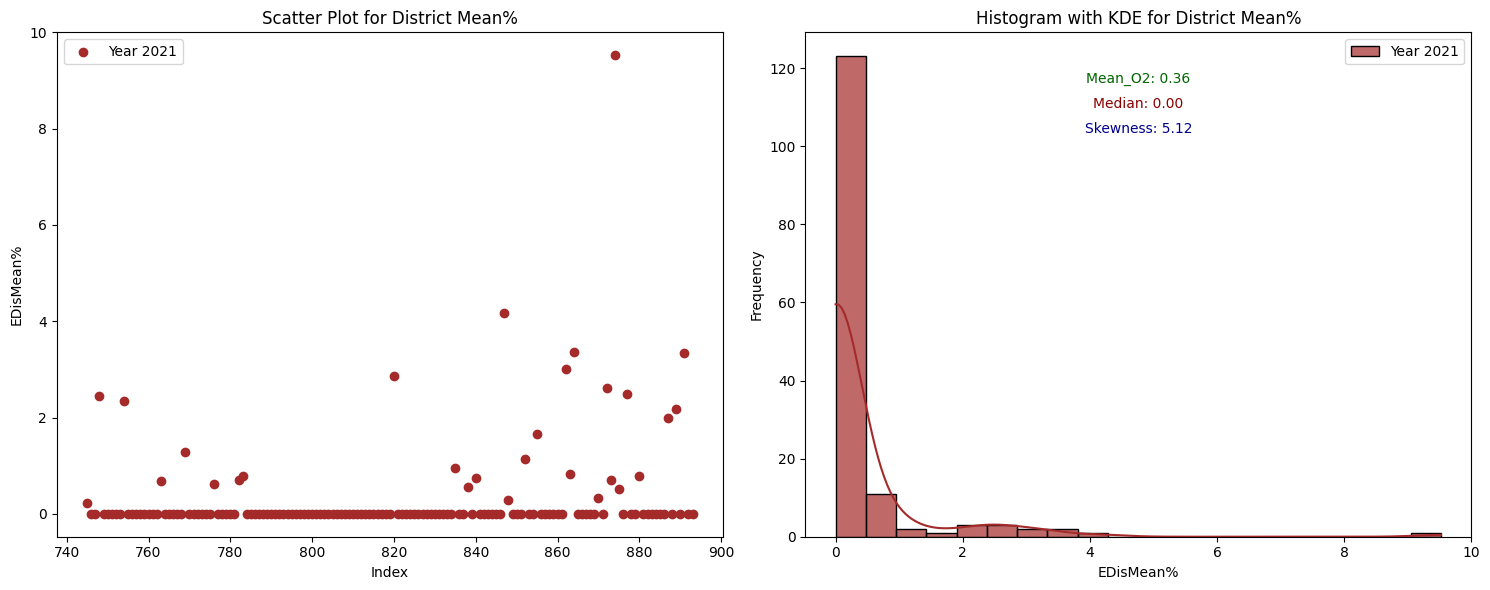

In [3]:
#%%capture
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Assuming 'allYear_district_df' contains the data for all years
# Initialize a dictionary to map years to colors
year_color_dict = {2016: 'darkred', 2017: 'green', 2018: 'blue', 2019: 'orange', 2020: 'purple', 2021: 'brown', 2022: 'gray'}

# Initialize the plot with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Loop through the range of years from 2021 to 2021
for year in range(2021, 2022):
    # Filter the DataFrame to include only the values where TitleYear is the current year
    filtered_df = allYear_district_df[allYear_district_df['TitleYear'] == year]
    filtered_df = filtered_df[filtered_df['#SusSKids'] >= 0]

    # Scatter Plot
    ax1.scatter(filtered_df.index, filtered_df['EDisMean%'], color=year_color_dict[year], marker='o', label=f'Year {year}')

    # Calculate mean, median, and skewness
    mean_value = filtered_df['EDisMean%'].mean()
    median_value = filtered_df['EDisMean%'].median()
    skewness_value = skew(filtered_df['EDisMean%'].dropna())

    # Annotate mean, median, and skewness on the histogram plot
    ax2.annotate(f'Mean_O2: {mean_value:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=10, color='darkgreen')
    ax2.annotate(f'Median: {median_value:.2f}', xy=(0.5, 0.85), xycoords='axes fraction', ha='center', fontsize=10, color='darkred')
    ax2.annotate(f'Skewness: {skewness_value:.2f}', xy=(0.5, 0.8), xycoords='axes fraction', ha='center', fontsize=10, color='darkblue')

    # Histogram Plot
    histplot = sns.histplot(filtered_df['EDisMean%'].dropna(), bins=20, color=year_color_dict[year], edgecolor='black', alpha=0.7, kde=True, line_kws={'color': 'black'}, label=f'Year {year}', ax=ax2)

    # Annotate each bar with its frequency count if count > 0
    #for rect in histplot.patches:
    #    height = rect.get_height()
    #    if height > 0:
    #        ax2.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8, color='black')

# Add labels, legends, and titles
ax1.set_xlabel('Index')
ax1.set_ylabel('EDisMean%')
ax1.legend()
ax1.set_title('Scatter Plot for District Mean%')

ax2.set_xlabel('EDisMean%')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.set_title('Histogram with KDE for District Mean%')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


#  **Answer:** Based on the histogram, Scatter plot and skewness calculation we can say the data is <span style="color:red">**highly right skewed**</span>.

____________________________________________________________________

# **_Told You, Our data is unique, so do you have any simple solution at all ?_**
### Alternative Measures

To mitigate the sensitivity to extreme values of right skewed data, alternative measures are:


| Alternative Measure      | Description                                                                                                                                                                                          | Verdict            | Reasons                                                                                                                                                                               |
|---------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Modified Z-Score          | Calculate the modified Z-score using the formula $$ \text{Modified Z-Score} = 0.6745 \times \frac{(X_i - \text{Median})}{\text{MAD}} $$                                                                      | **<span style="color:darkred">Inapplicable</span>**       | The Modified Z-Score becomes impractical in highly right-skewed data with a Median Absolute Deviation (MAD) of zero, as this results in a division by zero in the formula. Without variability in the non-zero values, the denominator being zero renders the Modified Z-Score inapplicable for assessing deviations in such a distribution.                                                                                                                              |
| Percentiles               | Examine percentiles other than the median and quartiles, e.g., 90th or 95th percentiles, to identify values significantly larger than most of the data.                                              | **<span style="color:darkred">Inapplicable</span>**       | In highly right-skewed data with a zero Interquartile Range (IQR), percentile-based methods (e.g., examining 90th or 95th percentiles) are ineffective. The absence of variability in non-zero values due to a zero IQR makes it difficult to establish meaningful outlier thresholds using traditional percentile measures, diminishing their discriminatory power.                                                                                                                                                                                                                                                                                                                       |
| Transformations           | Try data transformations, such as taking the logarithm, to reduce the impact of extreme values. After transformation, traditional outlier detection methods can be applied.                        | **<span style="color:gray">Complex</span>**            |                                                |
| Domain Knowledge          | Consider the context of the data and evaluate whether values appearing as outliers are meaningful in the specific domain.                                                                            | **<span style="color:green">Selected</span>**           | Domain knowledge is crucial to assess whether apparent outliers have valid and meaningful reasons within the specific context of the data.                                           |
| Clustering                | Use clustering techniques to identify groups or clusters in the data. Outliers may be points that do not belong to any cluster.                                                                      | **<span style="color:green">Selected</span>**           | Clustering provides an alternative approach when traditional measures of dispersion are challenging to apply due to the data's characteristics.                             |



Remember that outlier detection is often context-dependent, and the choice of method may depend on the specific characteristics and requirements of the data we have. It's also essential to consider the nature of the data and the goals of our analysis.

#  **Answer:** Well, how about we try to combine <span style="color:Orange">**Domain Knowledge & Clustering**</span>.

__________________

# **_Are the data identical over the years (2016~2022) ?_**

### let's plot side by side and examine, because <span style="color:blue"> _"A picture is worth a thousand words"_</span>

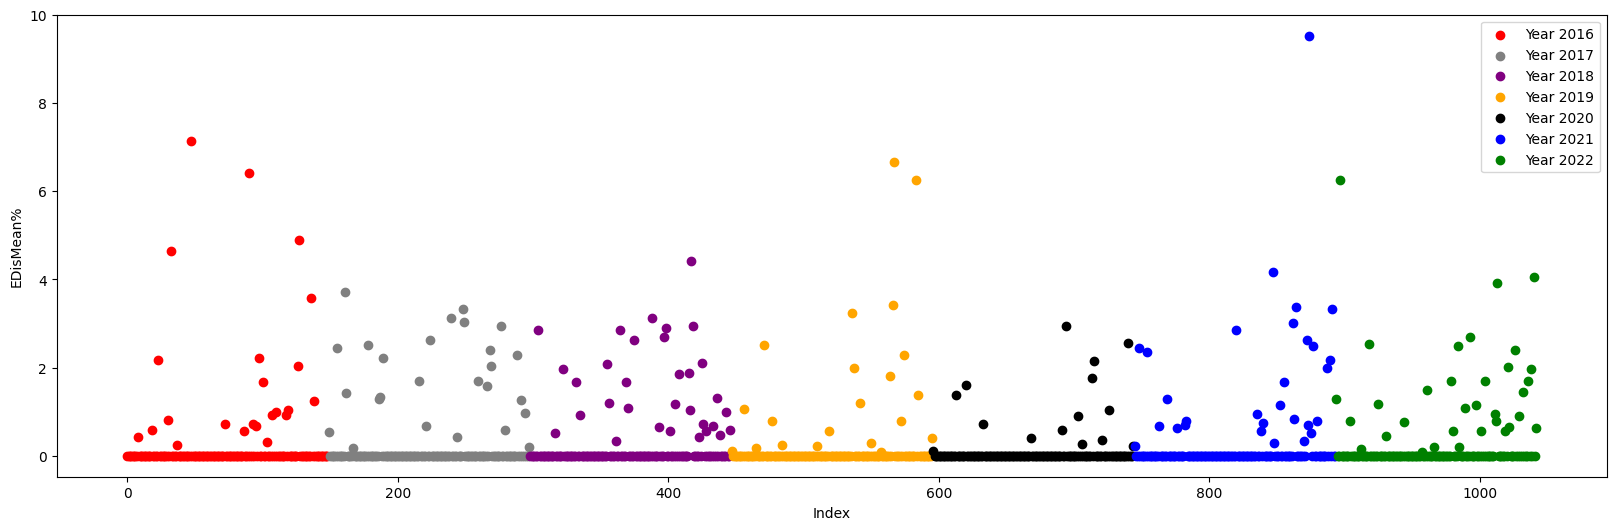

In [4]:
#%%capture
import matplotlib.pyplot as plt

# Assuming 'allYear_district_df' contains the data for all years
# Initialize a dictionary to map years to colors
year_color_dict = {2016: 'red', 2017: 'gray', 2018: 'purple', 2019: 'orange', 2020: 'black', 2021: 'blue', 2022: 'green'}

# Initialize the plot
plt.figure(figsize=(20, 6))

# Loop through the range of years from 2016 to 2022
for year in range(2016, 2023):
    # Filter the DataFrame to include only the values where TitleYear is the current year
    filtered_df = allYear_district_df[allYear_district_df['TitleYear'] == year]
    filtered_df=filtered_df[filtered_df['#SusSKids']>=0]

    # Plot the scatter plot for the current year with a unique color
    plt.scatter(filtered_df.index, filtered_df['EDisMean%'], color=year_color_dict[year], marker='o', label=f'Year {year}')

# Add labels and a legend
plt.xlabel('Index')
plt.ylabel('EDisMean%')
plt.legend()

# Show the plot
plt.show()
#print(allYear_district_df['EDisMean%']).skewness()

#  **Answer: <span style="color:green">Yess</span>, they are. Now what !!!**

_______________

# **_Time to see how our current method has been doing Historically!_**

#### **<span style="color:blue">Threshold >= 5.0%</span>**
#### **<span style="color:blue">Number of Suspended Kids, n>=10</span>**
#### **<span style="color:blue">min class size >=30</span>**


### Am I right? 
## _If so then it time to see another graph!_ 


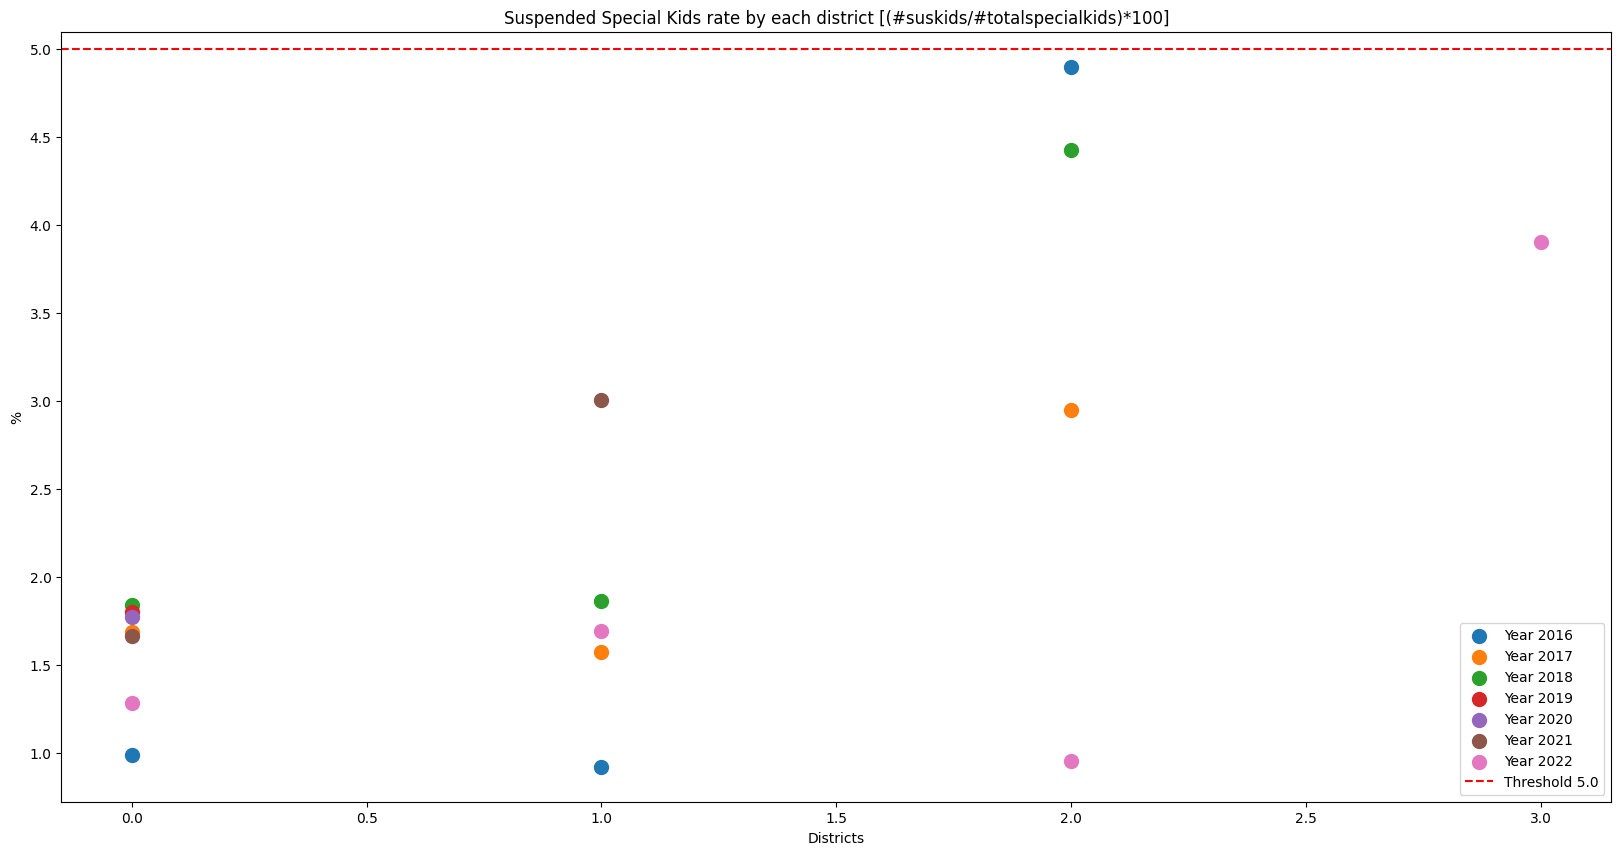

In [5]:
#%%capture
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn to get a color palette
palette = sns.color_palette('tab10', 7)

# Map years to colors
year_color_dict = {year: color for year, color in zip(range(2016, 2023), palette)}


# Assuming 'allYear_district_df' contains the data for all years
# Initialize a dictionary to map years to colors
#year_color_dict = {2016: '#1f77b4', 2017: '#ff7f0e', 2018: '#2ca02c', 2019: '#d62728', 2020: '#9467bd', 2021: '#e377c2', 2022: 'gray'}

# Threshold
x = 5.0

# Initialize the plot
plt.figure(figsize=(20, 10))

# Loop through the range of years from 2022 to 2023
for year in range(2016, 2023):
    # Filter the DataFrame to include only the values where TitleYear is the current year
    filtered_df = allYear_district_df[allYear_district_df['TitleYear'] == year]
    filtered_df=filtered_df[(filtered_df['#SusSKids']>9) & (filtered_df['#TotalSKids'] > 29)]

    # Reset the index so that there will be only 149 values in the x-axis
    filtered_df_reset_index = filtered_df.reset_index(drop=True)

    # Plot the scatter plot for the current year with a unique color
    plt.scatter(filtered_df_reset_index.index, filtered_df_reset_index['EDisMean%'], color=year_color_dict[year], marker='o', label=f'Year {year}', alpha=1, s=100)

    # Annotate points above the threshold with #SusSKids, #TotalSKids, and district name
    above_threshold = filtered_df_reset_index[filtered_df_reset_index['EDisMean%'] > x]
    for index, row in above_threshold.iterrows():
        plt.text(index, row['EDisMean%'], f"{row['#SusSKids']} / {row['#TotalSKids']}", ha='right', va='bottom', fontsize=8, color='black', rotation=0)
        plt.text(index, row['EDisMean%'], f"{row['DistrictName']}", ha='left', va='bottom', fontsize=8, color='blue', rotation=40)

# Add a dashed line at y=2.5
plt.axhline(y=x, color='red', linestyle='--', label=f'Threshold {x}')

# Add labels and a legend
plt.title('Suspended Special Kids rate by each district [(#suskids/#totalspecialkids)*100]')
plt.xlabel('Districts')
plt.ylabel('%')
plt.legend()

# Show the plot
plt.show()


#  **Answer: <span style="color:purple">What! no one !! </span>, time to modify**

_____

# **_We know that, tell us something we don't know already!_**

## Identifying minimum Class Size: 

In [6]:
#%%capture
# Calculate the minimum class size for each year
#result=allYear_district_df[allYear_district_df['#SusSKids']>0]
#result = result.groupby('TitleYear')['EDisMean%'].quantile([0.25, 0.75]).unstack()

result = allYear_district_df.groupby('TitleYear')['#TotalSKids'].quantile([0.05,0.10,0.15,0.20, 0.25]).unstack()

# Calculate the IQR for each year
#result['IQR'] = result[0.75] - result[0.25]

print(result)

           0.05  0.10  0.15  0.20  0.25
TitleYear                              
2016       17.0  24.0  26.0  28.0  31.0
2017       18.0  25.0  28.2  30.0  33.0
2018       20.0  24.8  29.2  32.0  35.0
2019       17.8  25.0  29.2  31.0  35.0
2020       19.0  25.0  27.0  31.0  34.0
2021       19.0  23.6  28.0  32.0  35.0
2022       19.8  23.8  27.2  32.0  36.0


## Identifying minimum number for suspended kids size, n: 

TitleYear   2016   2017   2018   2019   2020   2021   2022  Total
#SusSKids                                                        
0          126.0  123.0  117.0  128.0  134.0  120.0  116.0  864.0
1           12.0   16.0   16.0    8.0    6.0   14.0   15.0   87.0
2            3.0    2.0    3.0    7.0    3.0    5.0    5.0   28.0
3            4.0    2.0    5.0    2.0    3.0    2.0    4.0   22.0
4            NaN    1.0    3.0    NaN    NaN    3.0    2.0    9.0
5            NaN    1.0    1.0    NaN    2.0    1.0    NaN    5.0
6            NaN    1.0    NaN    1.0    NaN    NaN    3.0    5.0
7            1.0    NaN    1.0    NaN    NaN    1.0    NaN    3.0
8            NaN    NaN    NaN    2.0    NaN    1.0    NaN    3.0
10           NaN    NaN    1.0    NaN    NaN    NaN    1.0    2.0
11           NaN    1.0    NaN    NaN    NaN    NaN    NaN    1.0
12           NaN    NaN    NaN    NaN    NaN    NaN    1.0    1.0
17           1.0    NaN    NaN    NaN    NaN    NaN    NaN    1.0
20        

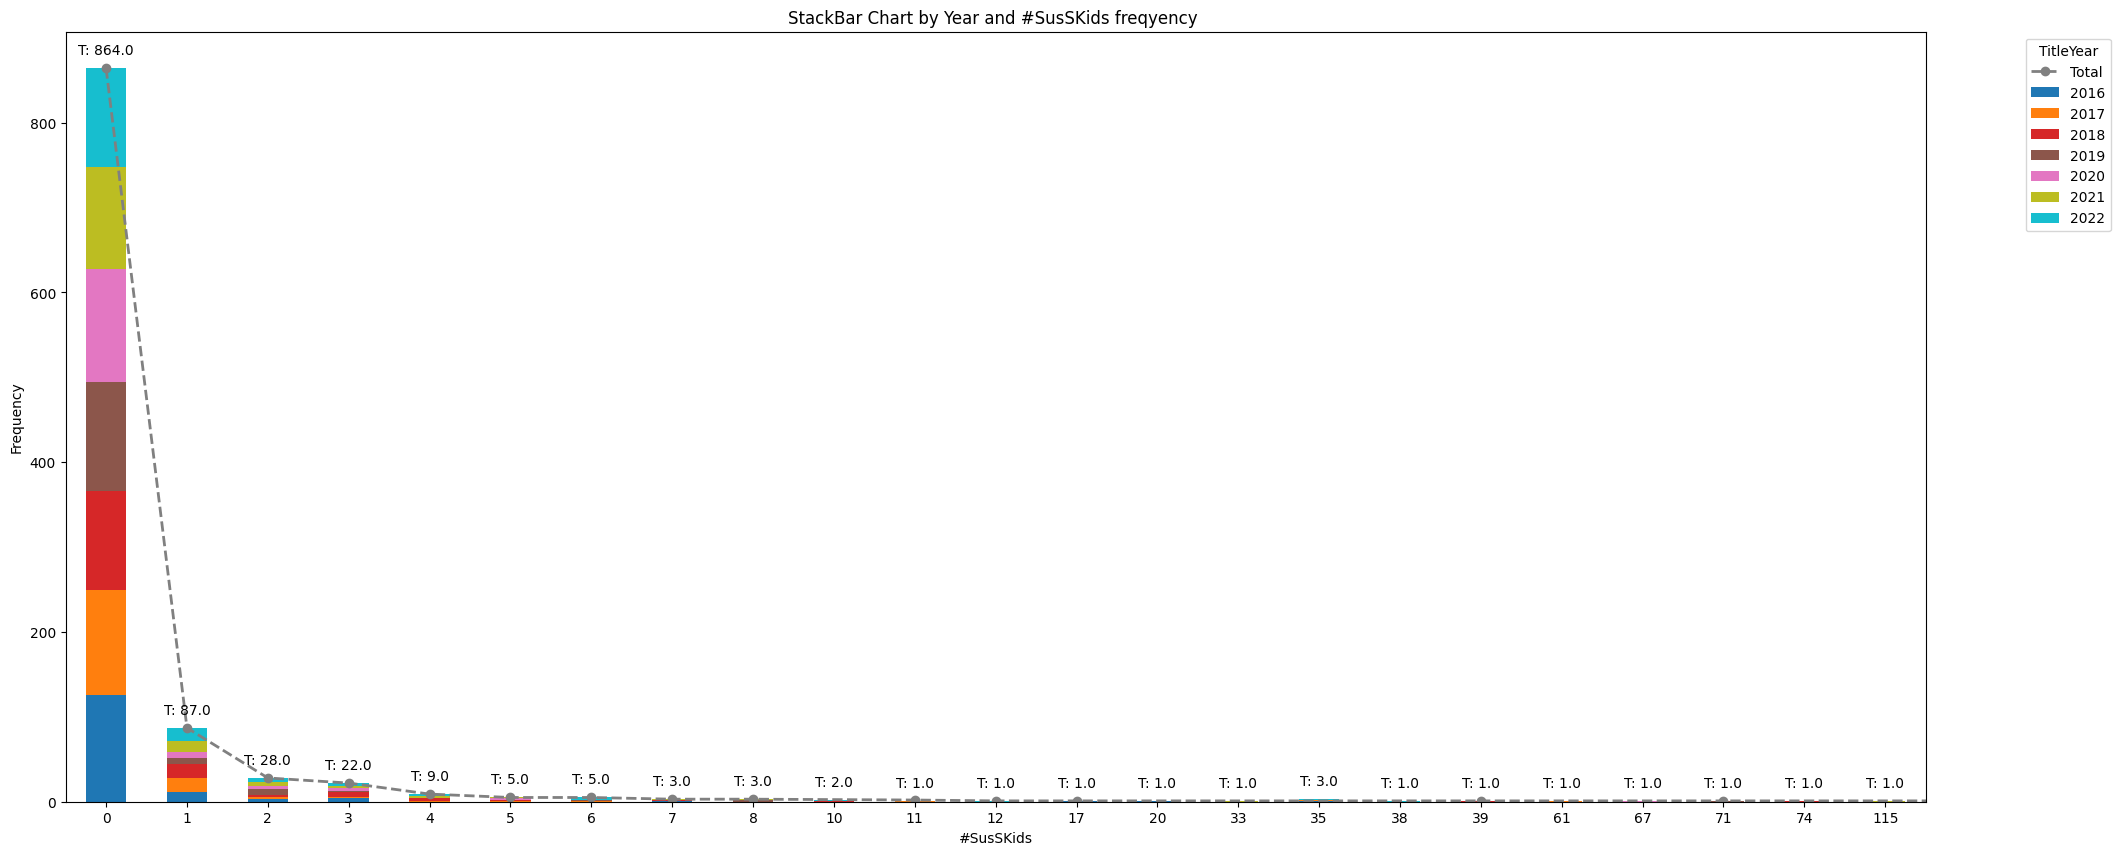

In [7]:
#%%capture
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'allYear_district_df' contains the data for all years
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', 286)  # Set the desired maximum number of rows
pd.set_option('display.max_columns', 8)  # Set the desired maximum number of columns

# Count occurrences by 'TitleYear' and '#SusSKids'
count_by_year_suskids = allYear_district_df.groupby(['TitleYear', '#SusSKids']).size().reset_index(name='Count')

# Pivot the DataFrame
pivot_df = count_by_year_suskids.pivot(index='#SusSKids', columns='TitleYear', values='Count')

# Calculate the total count for each '#SusSKids'
pivot_df['Total'] = pivot_df.sum(axis=1)

# Plotting
ax = pivot_df.drop(columns='Total').plot(kind='bar', stacked=True, figsize=(24, 10), colormap='tab10')
pivot_df['Total'].plot(kind='line', marker='o', color='gray', linewidth=2, linestyle='dashed', ax=ax, label='Total')

# Annotate total values on the line
for i, total in enumerate(pivot_df['Total']):
    plt.annotate(f'T: {total}', (i, total), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)


print(pivot_df)
plt.title('StackBar Chart by Year and #SusSKids freqyency ')
plt.xlabel('#SusSKids')
plt.ylabel('Frequency')
plt.legend(title='TitleYear', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




## my suggestion is:
## **<span style="color:darkgreen">Number of Suspended Kids, n>=3</span>**
## **<span style="color:darkgreen">min class size >=20</span>**

______________


# **_But what about threshold!_**

### let's use the **domain knowledge & Density Based clusting (DBSCAN)** through trial and error to find the threshold point....

  


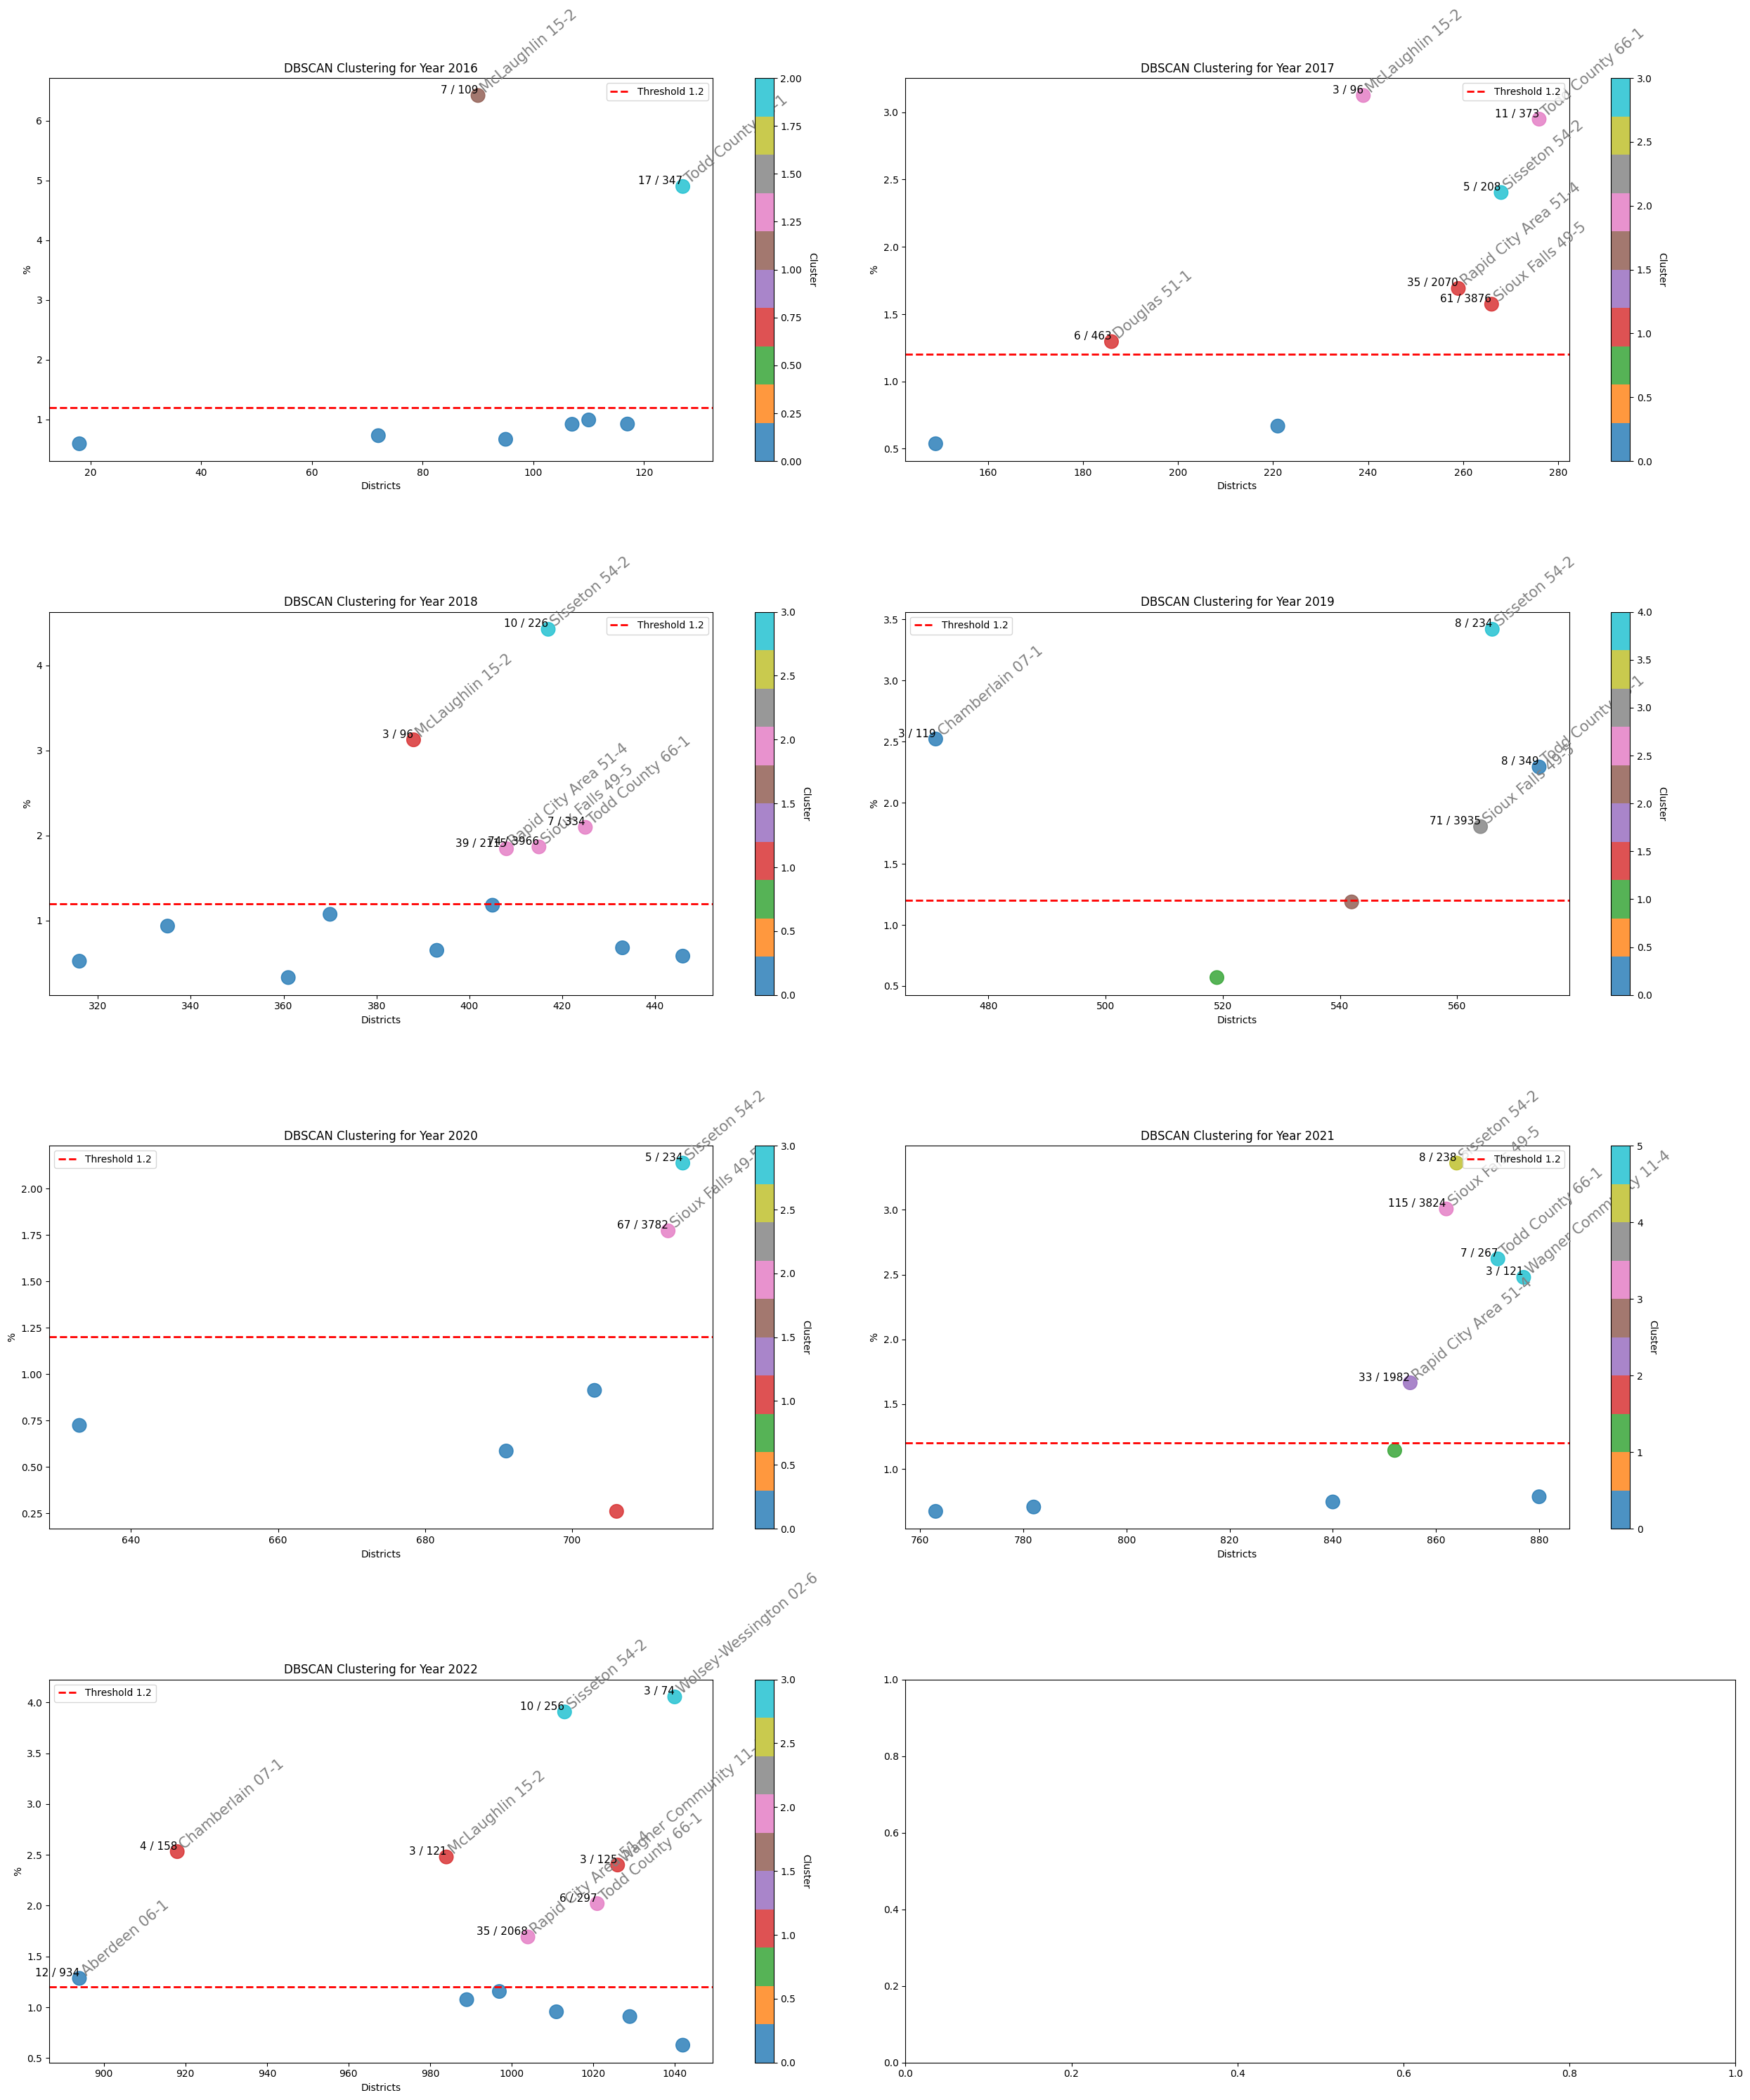

In [8]:
#%%capture
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Assuming 'allYear_district_df' contains the data for all years
# Select relevant columns for clustering (adjust as needed)
cluster_columns = ['EDisMean%']

# Set common parameters for DBSCAN
eps = 0.35
min_samples = 1

# Get unique years in the DataFrame
unique_years = allYear_district_df['TitleYear'].unique()

# Create a distinct color map for clustering
colors = list(mcolors.TABLEAU_COLORS.values())
cmap = mcolors.ListedColormap(colors)

# Calculate the number of rows and columns for subplots
num_rows = (len(unique_years) + 1) // 2  # Add 1 to handle odd number of years
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 30))

# Loop through each year
for i, year in enumerate(unique_years):
    # Calculate the position of the subplot
    row = i // num_cols
    col = i % num_cols

    # Filter the DataFrame for the current year and where '#SusSKids' > 2
    current_year_df = allYear_district_df[(allYear_district_df['TitleYear'] == year) & (allYear_district_df['#SusSKids'] > 2) & (allYear_district_df['#TotalSKids'] > 19)]

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(current_year_df[cluster_columns])

    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data_scaled)

    # Add cluster labels to the DataFrame
    current_year_df['Cluster'] = clusters

    # Plot the clusters on the current subplot with a modified marker size
    scatter = axes[row, col].scatter(current_year_df.index, current_year_df['EDisMean%'], c=clusters, cmap=cmap, alpha=0.8, s=200)  # Modify the 's' parameter here

    # Add colorbar and set the legend as the cluster labels
    cbar = fig.colorbar(scatter, ax=axes[row, col], label='Cluster')
    cbar.ax.set_ylabel('Cluster', rotation=270, labelpad=15)

    axes[row, col].set_title(f'DBSCAN Clustering for Year {year}')
    axes[row, col].set_xlabel('Districts')
    axes[row, col].set_ylabel('%')

    # Display the values of '#SusSKids' and '#TotalSKids' for each data point
    threshold = 1.2
    for index, row_data in current_year_df.iterrows():
        if row_data['EDisMean%'] > threshold:  # Only display for points above the threshold
            axes[row, col].text(index, row_data['EDisMean%'], f"{row_data['#SusSKids']} / {row_data['#TotalSKids']}", ha='right', va='bottom', fontsize=11, color='black', rotation=0)
            axes[row, col].text(index, row_data['EDisMean%'], f"{row_data['DistrictName']}", ha='left', va='bottom', fontsize=15, color='gray', rotation=40)

    # Add a horizontal line at the threshold
    axes[row, col].axhline(y=threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold {threshold}')

    # Add legend for the threshold
    axes[row, col].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



### My Final suggestion is:
# **Number of Suspended Kids, n<span style="color:darkgreen"> >=3</span>**
# **min class size<span style="color:darkgreen"> >=20</span>**
# **Threshold<span style="color:darkgreen"> =1.0</span>**


# **Conclusion:**


### - Threshold selection is pivotal, and in our analysis, we opted for a <span style="color:blue"> threshold over 3 times the state mean, guided by domain knowledge.</span>

### - Relying solely on a fixed threshold may lead to misinterpretations, as <span style="color:darkgreen">seen in 2022, where districts like Aberdeen, Mitchell, and Oglala Lakota were erroneously flagged as significant.</span>

### - To mitigate this, we employed the DBSCAN clustering algorithm. <span style="color:brown"> By standardizing the data and applying DBSCAN, we identified clusters of closely related districts based on the 'EDisMean%' feature. This approach helps capture districts with similar characteristics, even if their values are below the threshold.</span>


## _The combined use of domain knowledge and DBSCAN offers a robust approach, enhancing the accuracy and interpretability of identifying meaningful patterns and outliers in complex datasets._

# ********************************************************** THE END *********************************************************

# Extra: 

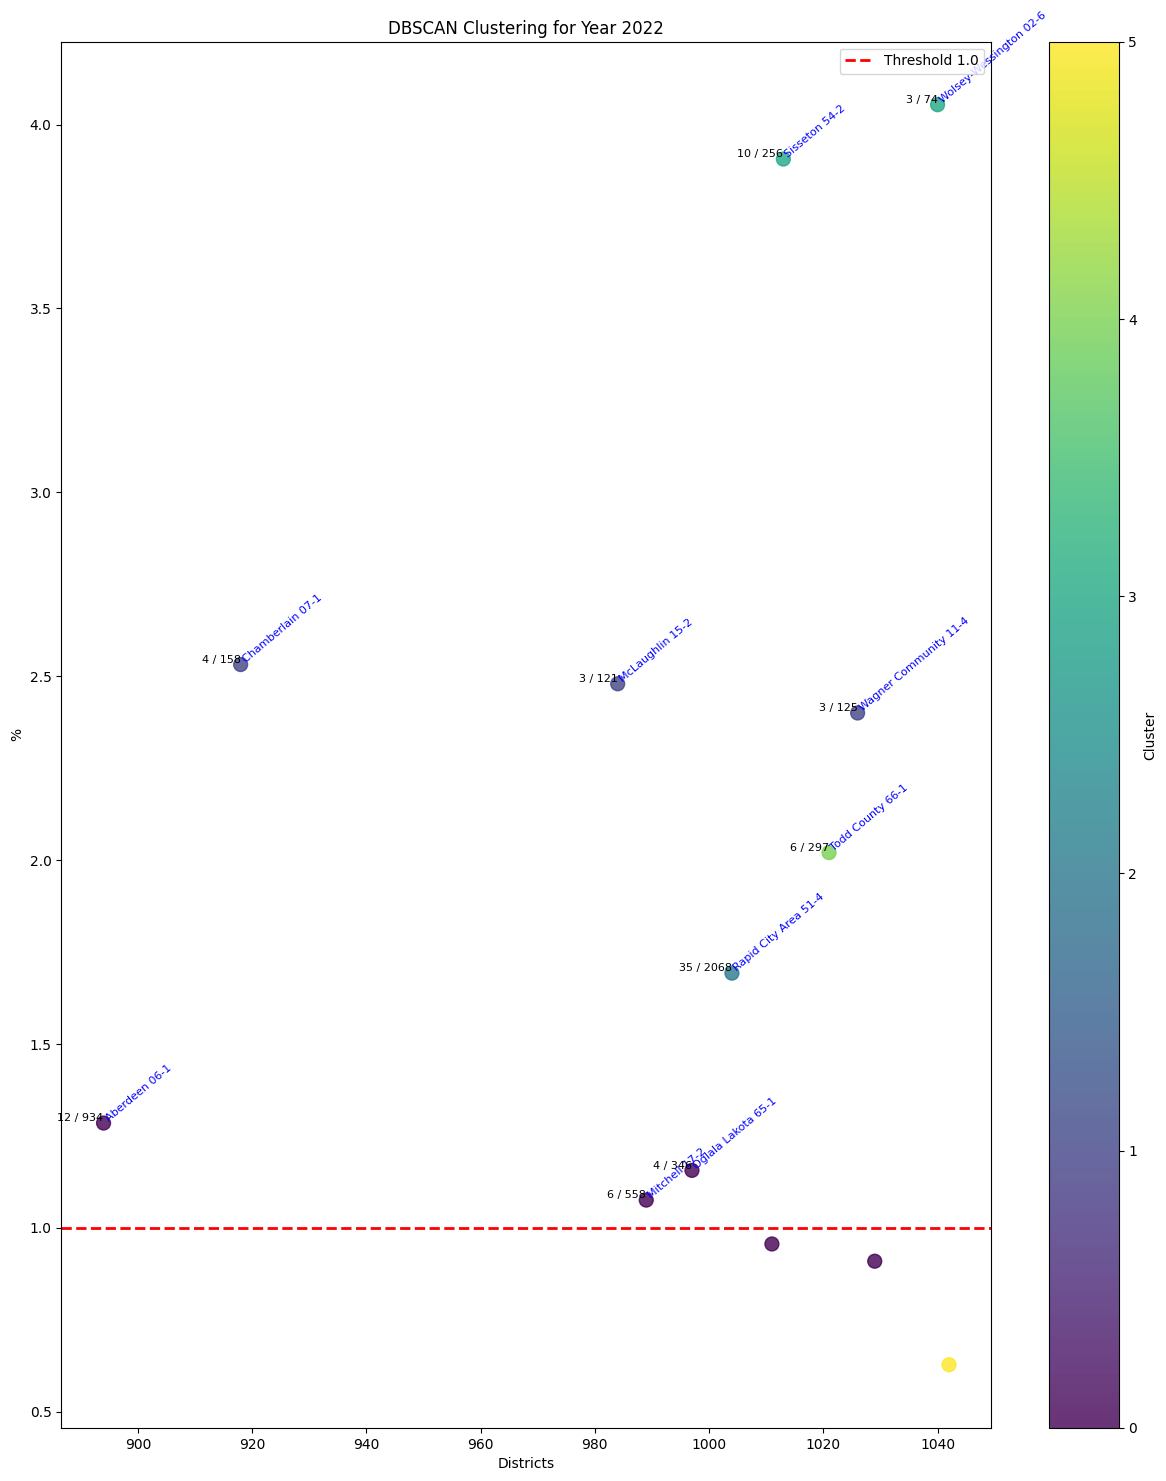

                DistrictName  EDisMean%  #SusSKids  #TotalSKids  Cluster
894            Aberdeen 06-1   1.284797         12          934        0
918         Chamberlain 07-1   2.531646          4          158        1
984          McLaughlin 15-2   2.479339          3          121        1
989            Mitchell 17-2   1.075269          6          558        0
997       Oglala Lakota 65-1   1.156069          4          346        0
1004    Rapid City Area 51-4   1.692456         35         2068        2
1011        Sioux Falls 49-5   0.955975         38         3975        0
1013           Sisseton 54-2   3.906250         10          256        3
1021        Todd County 66-1   2.020202          6          297        4
1026   Wagner Community 11-4   2.400000          3          125        1
1029          Watertown 14-4   0.909091          6          660        0
1040  Wolsey-Wessington 02-6   4.054054          3           74        3
1042            Yankton 63-3   0.627615          3 

In [9]:
#%%capture
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'allYear_district_df' contains the data for all years
# Filter the DataFrame for the year 2022
year_2022_df = allYear_district_df[allYear_district_df['TitleYear'] == 2022]
year_2022_df = year_2022_df[year_2022_df['#SusSKids'] > 2]

# Select relevant columns for clustering (adjust as needed)
cluster_columns = ['EDisMean%']

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(year_2022_df[cluster_columns])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=1)
clusters = dbscan.fit_predict(data_scaled)

# Add cluster labels to the DataFrame
year_2022_df['Cluster'] = clusters

# Initialize the plot
plt.figure(figsize=(15, 18))

# Plot the clusters
scatter = plt.scatter(year_2022_df.index, year_2022_df['EDisMean%'], c=clusters, cmap='viridis', alpha=0.8, s=100)

# Add colorbar and set the legend as the cluster labels
plt.colorbar(scatter, label='Cluster')
plt.title('DBSCAN Clustering for Year 2022')
plt.xlabel('Districts')
plt.ylabel('%')

# Display the values of '#SusSKids' and '#TotalSKids' for each data point
threshold = 1.0
for index, row_data in year_2022_df.iterrows():
    if row_data['EDisMean%'] > threshold:
        plt.text(index, row_data['EDisMean%'], f"{row_data['#SusSKids']} / {row_data['#TotalSKids']}", ha='right', va='bottom', fontsize=8, color='black', rotation=0)
        plt.text(index, row_data['EDisMean%'], f"{row_data['DistrictName']}", ha='left', va='bottom', fontsize=8, color='blue', rotation=40)

# Add a horizontal line at the threshold
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold {threshold}')

# Add legend for the threshold
plt.legend()

# Show the plot
plt.show()

# Display the DataFrame with cluster labels
print(year_2022_df[['DistrictName', 'EDisMean%', '#SusSKids', '#TotalSKids', 'Cluster']])
